#CONNECT TO MODUL IN GITHUB

In [ ]:
!mkdir data
!mkdir NLP_Models/slangword
!mkdir NLP_Models/stopword_noise
!mkdir NLP_Models/stopword_en
!mkdir NLP_Models/stopword
!wget -P NLP_Models/ https://raw.githubusercontent.com/muchlisp01/NLP/main/openewfile.py
!wget -P NLP_Models/ https://raw.githubusercontent.com/muchlisp01/NLP/main/Text_Mining.py
!wget -P NLP_Models/slangword/ https://raw.githubusercontent.com/muchlisp01/NLP/main/slangword.txt
!wget -P NLP_Models/stopword_noise/ https://raw.githubusercontent.com/muchlisp01/NLP/main/stopword_noise.txt
!wget -P NLP_Models/stopword_en/ https://raw.githubusercontent.com/muchlisp01/NLP/main/stopwords_en.txt
!wget -P NLP_Models/stopword/ https://raw.githubusercontent.com/muchlisp01/NLP/main/stopword_id.txt
!wget -P data/ https://raw.githubusercontent.com/muchlisp01/tugas-1-kelompok-kapsel/main/data/data_gigihadid.json
!wget -P data/ https://raw.githubusercontent.com/muchlisp01/tugas-1-kelompok-kapsel/main/data/data_yolanda.json
!wget -P data/ https://raw.githubusercontent.com/muchlisp01/tugas-1-kelompok-kapsel/main/data/data_zayn.json

mkdir: cannot create directory ‘NLP_Models/slangword’: No such file or directory
mkdir: cannot create directory ‘NLP_Models/stopword_noise’: No such file or directory
mkdir: cannot create directory ‘NLP_Models/stopword_en’: No such file or directory
mkdir: cannot create directory ‘NLP_Models/stopword’: No such file or directory
--2021-11-01 13:32:36--  https://raw.githubusercontent.com/muchlisp01/NLP/main/openewfile.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 230 [text/plain]
Saving to: ‘NLP_Models/openewfile.py’

openewfile.py       100%[===================>]     230  --.-KB/s    in 0s      

2021-11-01 13:32:36 (9.22 MB/s) - ‘NLP_Models/openewfile.py’ saved [230/230]

--2021-11-01 13:32:37--  https://raw.githubusercontent.com/muchlisp01/NLP/main/Tex

#INSTALLING PACKAGE

In [ ]:
!pip install unidecode twython tweepy beautifulsoup4 tika

     |████████████████████████████████| 235 kB 28.8 MB/s 
  Created wheel for tika: filename=tika-1.24-py3-none-any.whl size=32891 sha256=ce116dabf54ae0b05ca2c45ec07984eae73dcb2e60dbb95e643fac230e58fb7a
  Stored in directory: /root/.cache/pip/wheels/ec/2b/38/58ff05467a742e32f67f5d0de048fa046e764e2fbb25ac93f3
Successfully built tika


In [ ]:
import warnings; warnings.simplefilter('ignore')
import tweepy, json, nltk, urllib.request, requests
from urllib.request import Request, urlopen
from twython import TwythonStreamer
from bs4 import BeautifulSoup as bs

#CONNECT API TWITTER

In [ ]:
# Contoh API Keys (Sesuaikan dengan API keys masing-masing)
Ck = 'AxcBZJIgNK8dbdFMnEFj5cBGZ' # consumer_key
Cs = 'p2hFgXIW4mAp1mYyOVOHd5S5aZ6AUos2ewALwzPQUktNsTyaVF' # consumer_secret
At = '1414815395278557185-TAKI5qhUhDV7npq4r8IEnh3UVvyG9x' # access_token
As = 'xEBA8ACaNsWAatXHdemPQTPa2usdrE7x1EJ0HIbyNtMFg' # access_secret
'Done'

'Done'

In [ ]:
def twitter_connect(Ck, Cs, At, As, verbose = 0):
    try:
        auth = tweepy.OAuthHandler(Ck, Cs)
        auth.set_access_token(At, As)
        twitter = tweepy.API(auth, timeout=120)
        if verbose != 0:
            user = twitter.verify_credentials()
            print('Welcome "%s" you are now connected to twitter server' %user.name)
        return twitter
    except:
        print("Connection failed, please check your API keys or connection")
        return None

In [ ]:
# Koneksi ke twitter
twitter = twitter_connect(Ck, Cs, At, As, verbose = 1)

Welcome "Muchlis Pratama Putra" you are now connected to twitter server


#LOAD DATA

In [ ]:
!pip install docx2txt
import json
import pandas as pd
import re, os, itertools
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize
from spacy.lang.id import Indonesian
from html import unescape
from unidecode import unidecode
from nltk.tokenize import TweetTokenizer; Tokenizer = TweetTokenizer(reduce_len=True)
from nltk.stem import PorterStemmer;ps = PorterStemmer()
from string import punctuation
from textblob import TextBlob 

  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3980 sha256=08fa8881688e95907c783d14666b0f246d6863f74c7161c7669baa1e85715497
  Stored in directory: /root/.cache/pip/wheels/b7/20/b2/473e3aea9a0c0d3e7b2f7bd81d06d0794fec12752733d1f3a8
Successfully built docx2txt


In [ ]:
data1 = pd.read_json('data/data_gigihadid.json', lines=True)
data2 = pd.read_json('data/data_yolanda.json', lines=True)
data3 = pd.read_json('data/data_zayn.json', lines=True)
data=pd.concat([data1,data2,data3]).reset_index(drop=True)

In [ ]:
len(data)

32177

In [ ]:
data.keys()

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'display_text_range',
       'entities', 'extended_entities', 'metadata', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count',
       'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive',
       'lang', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
data.rename(columns={'full_text':'text'},inplace=True)

#CLEANING DATA

In [ ]:
from NLP_Models import Text_Mining as tm
from NLP_Models import openewfile as of
import time
from tqdm import tqdm
#import swifter


def cleanningtext(data, both = True, onlyclean = False, sentiment = False):
    print('Cleaning Text')
    fSlang = of.openfile(path = 'NLP_Models/slangword')
    bahasa = 'en'
    stops, lemmatizer = tm.LoadStopWords(bahasa, sentiment = sentiment)
    sw=open(fSlang,encoding='utf-8', errors ='ignore', mode='r');SlangS=sw.readlines();sw.close()
    SlangS = {slang.strip().split(':')[0]:slang.strip().split(':')[1] for slang in SlangS}
  
    start_time = time.time()
    tqdm.pandas()
    
    if both:
        data['text'] = data['text'].astype('str')
        data['text'] = data['text'].str.lower()
        data = data[~data.text.str.contains('unavailable')]
        data['cleaned_text'] = data['text'].progress_apply(lambda x : tm.cleanText(x,fix=SlangS, pattern2 = True, lang = bahasa, lemma=lemmatizer, stops = stops, symbols_remove = True, numbers_remove = True, hashtag_remove=False, min_charLen = 2))
        data['cleaned_text'] = data['cleaned_text'].progress_apply(lambda x : tm.handlingnegation(x))
        #data['cleaned_text'] = data['cleaned_text'].progress_apply(lambda x : tm.handlingporn(x))
    elif onlyclean: 
        data['cleaned_text'] = data['text'].progress_apply(lambda x : tm.cleanText(x, fix=SlangS, pattern2 = True, lang = bahasa, lemma=lemmatizer, stops = stops, symbols_remove = True, numbers_remove = True, hashtag_remove=False, min_charLen = 3))
    else:
        data['cleaned_text'] = data['text'].progress_apply(lambda x : tm.handlingnegation(x))
    
    data = data[data['cleaned_text'].notna()]
    print("%s seconds" %(time.time()-start_time))
    
    return data

In [ ]:
dataFinal = cleanningtext(data = data, both = True, onlyclean = False, sentiment = False)

Cleaning Text


100%|██████████| 32177/32177 [00:00<00:00, 187062.69it/s]


17.214245796203613 seconds


In [ ]:
dataFinal.head()

,created_at,id,id_str,text,truncated,display_text_range,entities,extended_entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,retweeted_status,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,quoted_status_id,quoted_status_id_str,quoted_status,cleaned_text
0,2021-11-01 05:11:16+00:00,1455039716001296384,1455039716001296384,"rt @archive96s: bella &amp; gigi hadid, hallow...",False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1454858221110415368, 'id_str...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 1143306091926892544, 'id_str': '1143306...",NaN,NaN,None,NaN,{'created_at': 'Sun Oct 31 17:10:07 +0000 2021...,False,57,0,False,False,1.0,in,NaN,NaN,NaN,retweet bella gigi hadid halloween
1,2021-11-01 04:56:15+00:00,1455035936874455045,1455035936874455040,jadi sebenarnya zayn malik putus sama gigi had...,False,"[0, 62]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 985380354335756288, 'id_str': '98538035...",NaN,NaN,None,NaN,NaN,False,0,0,False,False,NaN,in,NaN,NaN,NaN,jadi sebenarnya zayn malik putus sama gigi had...
2,2021-11-01 04:18:08+00:00,1455026346883641345,1455026346883641344,rt @muthiastp: zayn malik sama gigi hadid putu...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 1448419879, 'id_str': '1448419879', 'na...",NaN,NaN,None,NaN,{'created_at': 'Sat Oct 30 18:16:36 +0000 2021...,False,92,0,False,False,NaN,in,NaN,NaN,NaN,retweet zayn malik sama gigi hadid putus gara ...
3,2021-11-01 03:50:41+00:00,1455019438718078976,1455019438718078976,rt @guzelligebakin: gigi hadid https://t.co/9s...,False,"[0, 54]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1454054448133718021, 'id_str...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 222414018, 'id_str': '222414018', 'name...",NaN,NaN,None,NaN,{'created_at': 'Fri Oct 29 11:56:10 +0000 2021...,False,125,0,False,False,0.0,in,NaN,NaN,NaN,retweet gigi hadid
4,2021-11-01 03:34:19+00:00,1455015318581960704,1455015318581960704,"berita pertama datang dari zayn, yang dikenaka...",False,"[0, 218]","{'hashtags': [{'text': 'RoadShow', 'indices': ...","{'media': [{'id': 1455015310545670147, 'id_str...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 74664107, 'id_str': '74664107', 'name':...",NaN,NaN,None,NaN,NaN,False,0,0,False,False,0.0,in,NaN,NaN,NaN,berita pertama datang dari zayn yang dikenakan...


In [ ]:
dataFinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32177 entries, 0 to 32176
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   created_at                 32177 non-null  datetime64[ns, UTC]
 1   id                         32177 non-null  int64              
 2   id_str                     32177 non-null  int64              
 3   text                       32177 non-null  object             
 4   truncated                  32177 non-null  bool               
 5   display_text_range         32177 non-null  object             
 6   entities                   32177 non-null  object             
 7   extended_entities          7178 non-null   object             
 8   metadata                   32177 non-null  object             
 9   source                     32177 non-null  object             
 10  in_reply_to_status_id      5592 non-null   float64            
 11  in

In [ ]:
datacleaned=dataFinal[['cleaned_text']]
datacleaned.to_csv('data/dataclean.txt', index=False)

#GEO CODE

In [ ]:
auth = tweepy.auth.OAuthHandler(Ck, Cs)
auth.set_access_token(At, As)
api = tweepy.API(auth)

Geo, N = "-6.306870,106.746872,30km", 50  # HAti-hati jangan ada spasi di Lat-Lon-Radius
qry = 'gigi hadid OR zayn OR yolanda'
for tweet in tweepy.Cursor(api.search, q=qry, count=100, geocode=Geo).items(N):
    print([tweet.created_at, tweet.text.encode('utf-8'), tweet.user.id, tweet.geo])

[datetime.datetime(2021, 11, 1, 11, 33, 32), b'Tumben nih blom ada twitt yang pengen belajar dari Zayn malik dan Gigi hadid', 2166776492, None]
[datetime.datetime(2021, 11, 1, 10, 54, 54), b'@Askrlfess Jadi inget ocehan teman waktu liat ig cewe pake kaos putih + jeans biru sobek + sendal jepit. Temanku bi\xe2\x80\xa6 https://t.co/6TxaDEbM7J', 893445915872174080, None]
[datetime.datetime(2021, 11, 1, 3, 34, 19), b'Berita pertama datang dari Zayn, yang dikenakan masa percobaan karena tudingan kekerasan yang diajukan oleh Yolanda\xe2\x80\xa6 https://t.co/0wCBunZ24I', 74664107, None]
[datetime.datetime(2021, 11, 1, 0, 16, 27), b'Selama ini w kira Bela Hadid itu kakaknya, Gigi Hadid adeknya', 139963881, None]
[datetime.datetime(2021, 10, 31, 22, 30, 28), b'@anggitaelfrida @vennyoktav Pasti sing dimaksud gigi hadid kan?', 79171031, None]
[datetime.datetime(2021, 10, 31, 18, 43, 53), b'Zain Malik Putus Dari Gigi Hadid, Sepakat Mengasuh Anak Bersama\n#IkatanCintaEp491\nZayn Malik\n#WeAreWithZa

#EDA

MENCARI TWEET DENGAN RETWEET TERBANYAK

In [ ]:
retweet = dataFinal[['text', 'cleaned_text', 'retweet_count',]]
retweet.sort_values(by=['retweet_count'], ascending=False).head()

,text,cleaned_text,retweet_count
25530,rt @zaynmalik: teehee,retweet teehee,26352
11078,"rt @amrazing: “kalau berdoa minta rezeki, jang...",retweet kalau berdoa minta rezeki jangan negxl...,13294
15515,rt @fyudiwibowo4: balada sebuah masterpiece\n\...,retweet balada sebuah masterpiece banyak orang...,11980
17325,rt @folderofjeon: jungkook???!!!!!??? https://...,retweet jungkook,9103
17289,rt @aemieruls_: dia ingat kita tak nampak ke ?...,retweet dia ingat kita tidak negxnampak ke,8865


In [ ]:
retweet.loc[25530, 'text']

'rt @zaynmalik: teehee'

TWEET DENGAN LIKE TERBANYAK

In [ ]:
likes = dataFinal[['text', 'cleaned_text', 'favorite_count']]
likes.sort_values(by=['favorite_count'], ascending=False).head()

,text,cleaned_text,favorite_count
4907,zayn malik dan gigi hadid resmi berpisah wst 😭...,zayn malik gigi hadid resmi berpisah wst,27830
23272,"dis! zayn udah resmi dilaporkan, kita tunggu a...",dis zayn sudah resmi dilaporkan kita tunggu saja,17598
1897,gigi hadid https://t.co/9sfzflzpl7,gigi hadid,12154
4909,zayn malik dan gigi hadid berpisah wst 😭 https...,zayn malik gigi hadid berpisah wst,9058
9206,perseteruan antara yolanda hadid &amp; zayn ma...,perseteruan antara yolanda hadid zayn malik,4370


In [ ]:
likes.loc[4907, 'text']

'zayn malik dan gigi hadid resmi berpisah wst 😭 https://t.co/vjyelqwnko'

#VISUALISASI

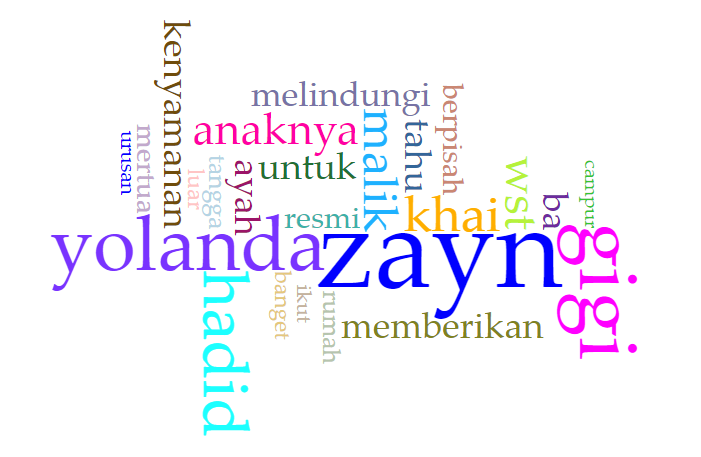

Dari wordcloud diatas, terdapat 25 kata paling sering muncul, top3 diantaranya adalah ZAYN, GIGI, YOLANDA. Oleh karena itu, kami ambil 3 kata tersebut untuk dicari trend dan word tree-nya

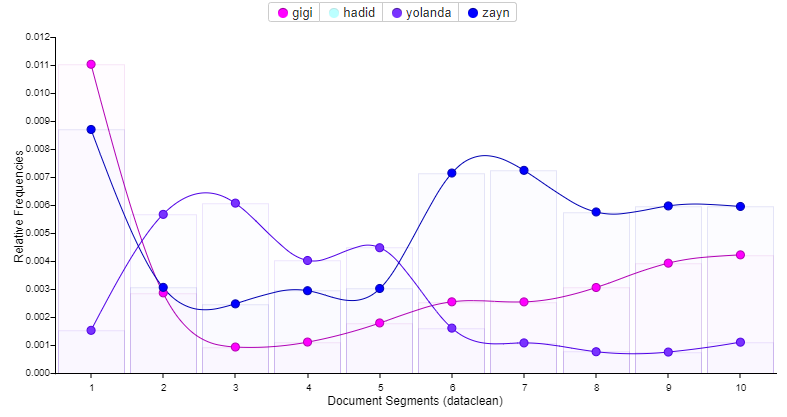

Tren diawali dari Gigi dan Zayn, dari analisis topic diperoleh sebab Zayn yang memaki gigi pada saat halloween kemudian muncul Yolanda dimana menjadi penyebab perseteruan Zayn dan Gigi karena dirasa terlalu ikut campur urusan rumah tangga keduanya. Lalu tren diakhiri dengan Gigi dan Zayn ketika ada desas desus bahwa mereka memutuskan mengakhiri hubungan.

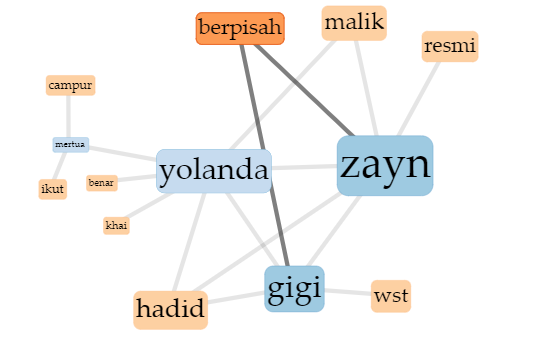

Gambar diatas menunjukkan kata-kata yang paling sering muncul secara bersamaan dalam satu kalimat pada data. Beberapa kata yang saling terhubung dengan garis menunjukkan bahwa kata-kata tersebut sering muncul dalam satu kalimat. Dari gambar diatas bisa kita simpulkan bahwa Zayn Malik dan Gigi Hadid telah resmi berpisah dikarenakan Yolanda, mertua dari Zayn Malik yang terlalu ikut campur dalam hubungan anaknya.

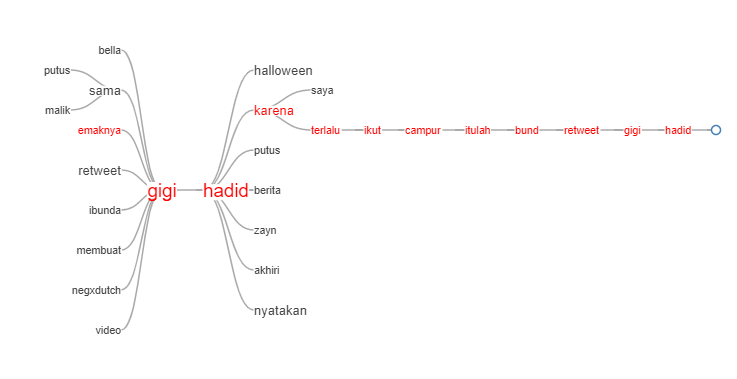

Dari word tree diatas dapat kita simpulkan bahwa netizen Indonesia beranggapan kalau Gigi Hadid putus dengan Zayn Malik karena ibunya yang terlalu ikut campur.

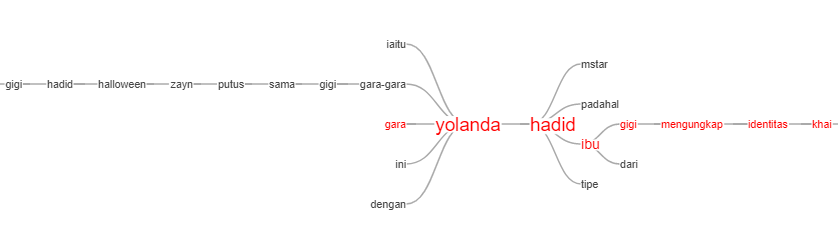

Dari word tree diatas dapat kita simpulkan bahwa netizen Indonesia beranggapan kalau Gigi Hadid putus dengan Zayn Malik karena Yolanda, ibu dari Gigi Hadid mengungkap identitas Khai, anak mereka.


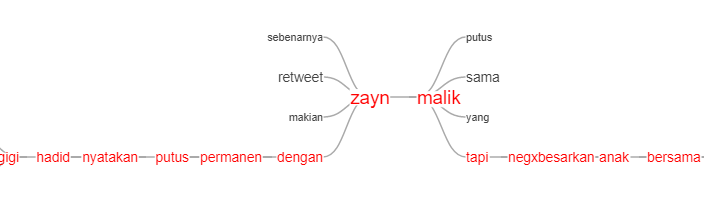

Dari word tree diatas dapat kita simpulkan bahwa netizen Indonesia beranggapan kalau Gigi Hadid telah menyatakan bahwa dirinya sudah putus dengan Zayn Malik, tetapi mereka akan tetap membesarkan anaknya bersama-sama.

#Akhirul kata
Apapun yang membuat kita menjadi tahu dari yang asalnya tidak tahu adalah informasi